In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Örnek drone sensör verisi
np.random.seed(42)
data = {
    "time": range(1, 51),
    "temperature": np.random.normal(35, 1.5, 50),
    "altitude": np.random.normal(120, 10, 50),
    "speed": np.random.normal(50, 5, 50)
}
df = pd.DataFrame(data)
df.head()


,time,temperature,altitude,speed
0,1,35.745071,123.240840,42.923146
1,2,34.792604,116.149177,47.896773
2,3,35.971533,113.230780,48.286427
3,4,37.284545,126.116763,45.988614
4,5,34.648770,130.309995,49.193571


Görselleştirme

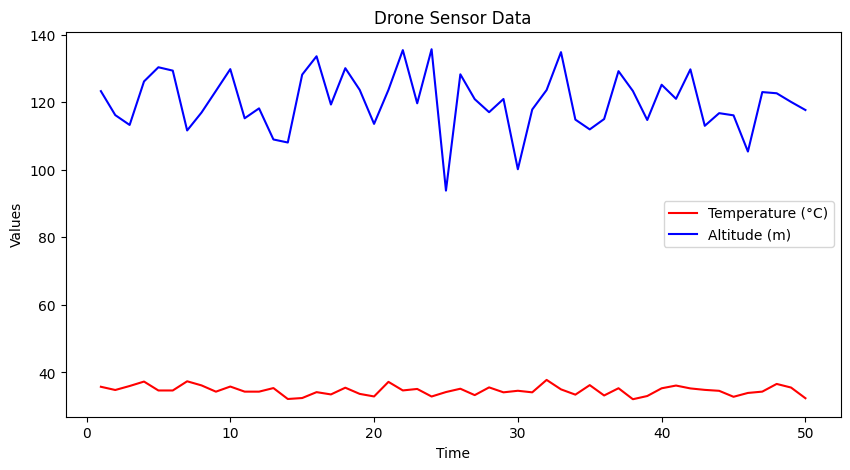

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df["time"], df["temperature"], label="Temperature (°C)", color="red")
plt.plot(df["time"], df["altitude"], label="Altitude (m)", color="blue")
plt.legend()
plt.title("Drone Sensor Data")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()


Basit Anomali Tespiti

In [4]:
# Z-score yöntemiyle anomali
mean_temp = df["temperature"].mean()
std_temp = df["temperature"].std()
df["anomaly"] = np.abs(df["temperature"] - mean_temp) > 2 * std_temp

anomalies = df[df["anomaly"]]
print(anomalies)


    time  temperature    altitude      speed  anomaly
31    32    37.778417  123.571126  50.342815     True


Grafikte Anomalilikleri Göster

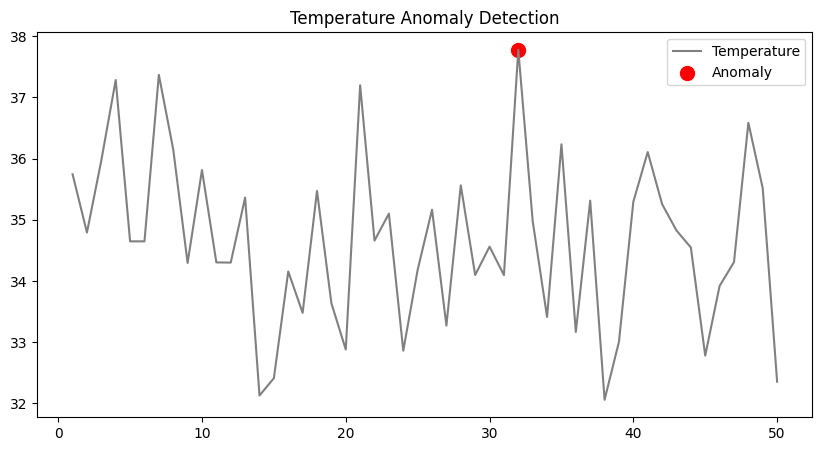

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df["time"], df["temperature"], label="Temperature", color="gray")
plt.scatter(anomalies["time"], anomalies["temperature"], color="red", label="Anomaly", s=100)
plt.legend()
plt.title("Temperature Anomaly Detection")
plt.show()
